In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from sklearn.externals import joblib

% matplotlib inline

Using TensorFlow backend.


MSE:
- dnn_0208: 35.3% RS
- dnn_0208_2: 35.1% RS
- dnn_0208_3: 33.3% RS


MAE:
- E1: 28%
- E2: 29%
- E3: 29%

In [3]:
train_df = pd.read_csv("~/real_estate/data/v11/train_df.csv")
test_df = pd.read_csv("~/real_estate/data/v11/test_df.csv")

features = train_df.columns[:-2]

X_train = train_df[features]
X_test = test_df[features]
y_train = train_df["target"]
y_test = test_df["target"]

In [14]:
# compile DNN
#model = Sequential()
#model.add(Dense(units=100, activation='relu', input_dim=69))
#model.add(Dense(units=50, activation='relu'))
#model.add(Dense(units=25, activation='relu'))
#model.add(Dense(units=1))
#model.compile(loss='mean_squared_error', optimizer='adam')

# Run DNN
model.fit(X_train, y_train, epochs=1, batch_size=10)

### model.save("/home/gnazareths/real_estate/v11/models/dnn_0208_3.h5")

Epoch 1/1
123728/123728 [==============================] - 30s 239us/step - loss: 0.0041


In [15]:
# Get predictions and errors
y_train_hat = model.predict(X_train).reshape(1, -1)
y_test_hat = model.predict(X_test).reshape(1, -1)

errors_train = abs(y_train_hat - y_train.values)

errors_test = abs(y_test_hat - y_test.values)

print("Mean test error: ", np.mean(errors_test))
print("Mean test value: ", np.mean(y_test))
print("R^2 test: ", np.square(np.corrcoef(y_test, y_test_hat)[0,1]))
print('---')
print("Mean train error: ", np.mean(errors_train))
print("Mean train value: ", np.mean(y_train))
print("R^2 train: ", np.square(np.corrcoef(y_train, y_train_hat)[0,1]))

Mean test error:  0.050720444697500935
Mean test value:  0.0838149683686396
R^2 test:  0.30515625218086756
---
Mean train error:  0.05213529853619533
Mean train value:  0.08733916101717423
R^2 train:  0.43383931316110225


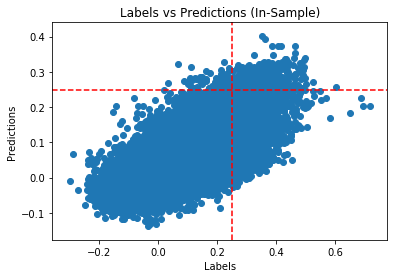

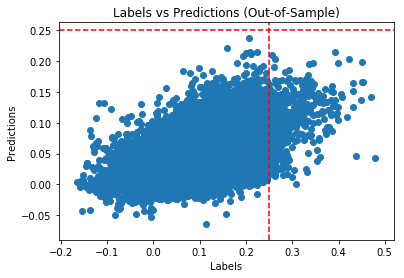

In [16]:
plt.scatter(y_train, y_train_hat)
plt.title("Labels vs Predictions (In-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

plt.scatter(y_test, y_test_hat)
plt.title("Labels vs Predictions (Out-of-Sample)")
plt.ylabel("Predictions")
plt.xlabel("Labels")
plt.axvline(x=0.25, color="red", linestyle='--')
plt.axhline(y=0.25, color="r", linestyle='--')
plt.show()

In [17]:
predictive_df = pd.DataFrame({"label": y_test.values, "pred": y_test_hat[0]})
predictive_df = predictive_df.sort_values(by=["pred"], ascending=False)

predictive_df_25 = predictive_df.loc[predictive_df["pred"] >= .25]
top_10_predictions = predictive_df.head(n=10)
top_25_predictions = predictive_df.head(n=25)

mean_return_over_25 = np.mean(predictive_df_25["label"].values)
mean_return_top_10_predictions = np.mean(top_10_predictions["label"].values)
mean_return_top_25_predictions = np.mean(top_25_predictions["label"].values)

print("Mean return for predictions above 25%: ", mean_return_over_25)
print("Mean return for top 10 predictions: ", mean_return_top_10_predictions)
print("Mean return for top 25 predictions: ", mean_return_top_25_predictions)

Mean return for predictions above 25%:  nan
Mean return for top 10 predictions:  0.23171476330266025
Mean return for top 25 predictions:  0.2533835546062237


/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/gnazareths/.local/lib/python3.5/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
